<a href="https://colab.research.google.com/github/PabasaraSenadheera/Data-Analysis-Dashboard/blob/main/Sales_Analysis_of_Pan_Pizza_Shop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving new Pan Pizza details.xlsx to new Pan Pizza details.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

df = pd.read_excel('pizza_dataset.xlsx')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

In [ ]:

sns.set_palette("pastel")

In [ ]:
#Convert DATE to datetime if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract month and day of week for time-based analysis
df['Month'] = df['DATE'].dt.month_name()
df['DayOfWeek'] = df['DATE'].dt.day_name()
df['Quarter'] = df['DATE'].dt.quarter

# Calculate revenue (sales qty * selling price)
df['Revenue'] = df['sales qty'] * df['Product data(2).Selling Price']

# Calculate profit (revenue - (sales qty * cost))
df['Profit'] = df['Revenue'] - (df['sales qty'] * df['Product data(2).Cost'])

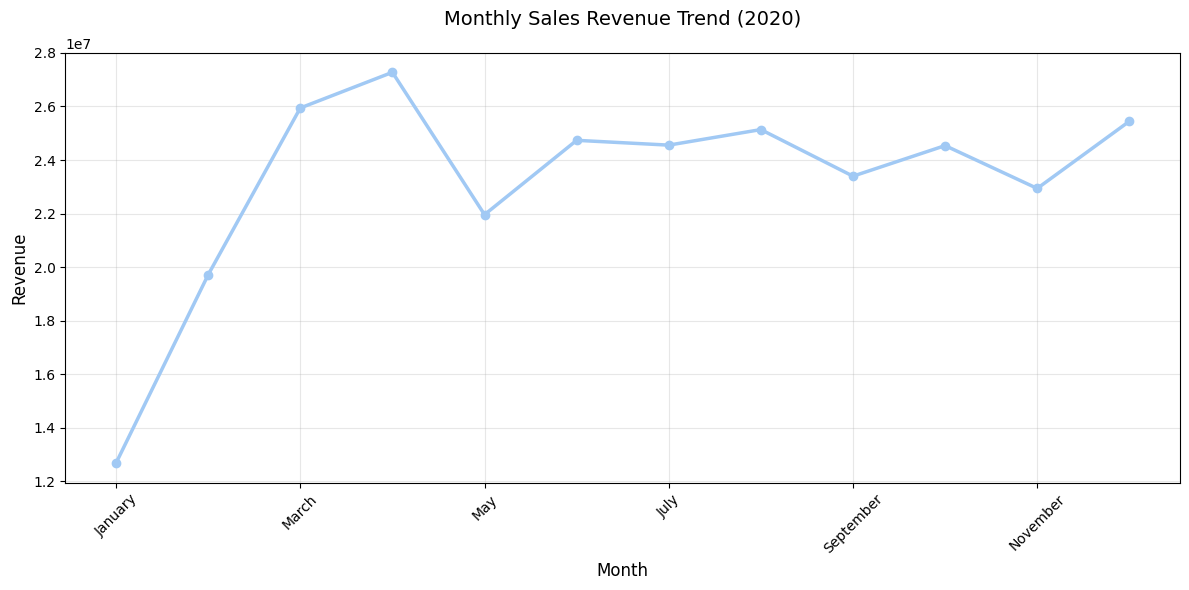

In [ ]:
plt.figure(figsize=(12, 6))
monthly_revenue = df.groupby('Month')['Revenue'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

monthly_revenue.plot(kind='line', marker='o', linewidth=2.5)
plt.title('Monthly Sales Revenue Trend (2020)', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

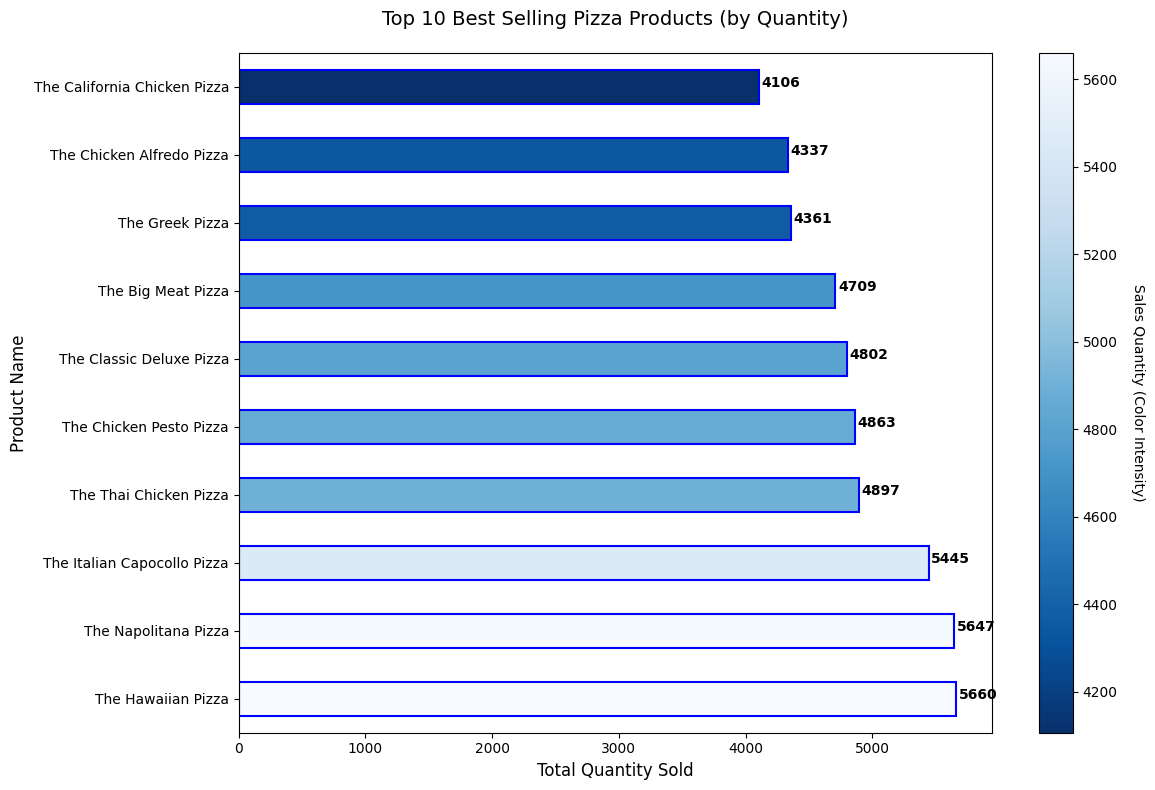

In [ ]:
plt.figure(figsize=(12, 8))

# Prepare data
top_products = df.groupby('Product name')['sales qty'].sum().sort_values(ascending=False).head(10)

# Normalize for color mapping
norm = Normalize(vmin=top_products.min(), vmax=top_products.max())
sm = ScalarMappable(cmap="Blues_r", norm=norm)
colors = [sm.to_rgba(val) for val in top_products]

# Create bar plot with borders
ax = top_products.plot(kind='barh', color=colors, edgecolor='blue', linewidth=1.5)
plt.title('Top 10 Best Selling Pizza Products (by Quantity)', fontsize=14, pad=20)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Add value labels
for i, v in enumerate(top_products):
    ax.text(v + 20, i, str(v), color='black', fontweight='bold')

# Add heatmap-style color legend
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Sales Quantity (Color Intensity)', rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

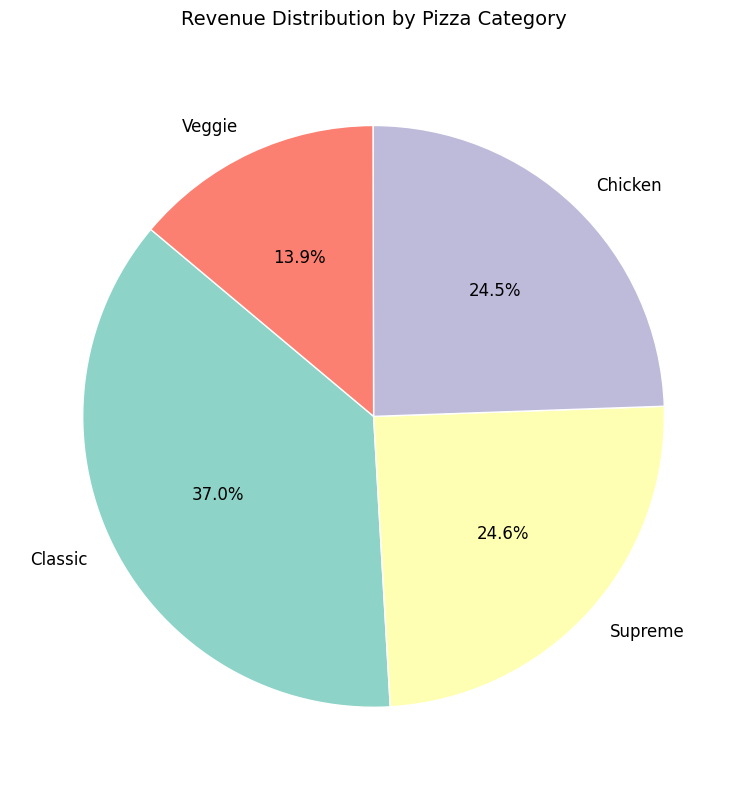

In [ ]:
plt.figure(figsize=(10, 8))
category_sales = df.groupby('Product category')['Revenue'].sum().sort_values(ascending=False)

# Create a pie chart with percentage labels
patches, texts, autotexts = plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("Set3"),
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

plt.title('Revenue Distribution by Pizza Category', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

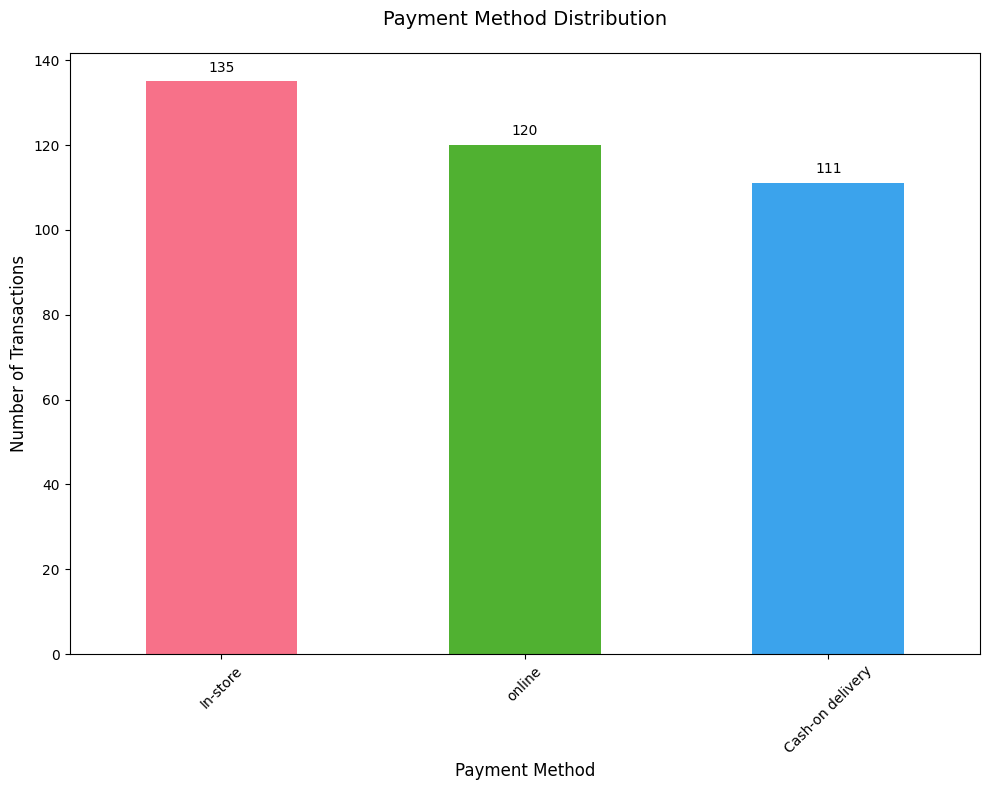

In [ ]:
plt.figure(figsize=(10, 8))
payment_counts = df['Sales Payment Type'].value_counts()

ax = payment_counts.plot(kind='bar', color=sns.color_palette("husl", 3))
plt.title('Payment Method Distribution', fontsize=14, pad=20)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)

# Add value labels
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

Each box shows how much revenue was made on a specific day of the week during a specific month.

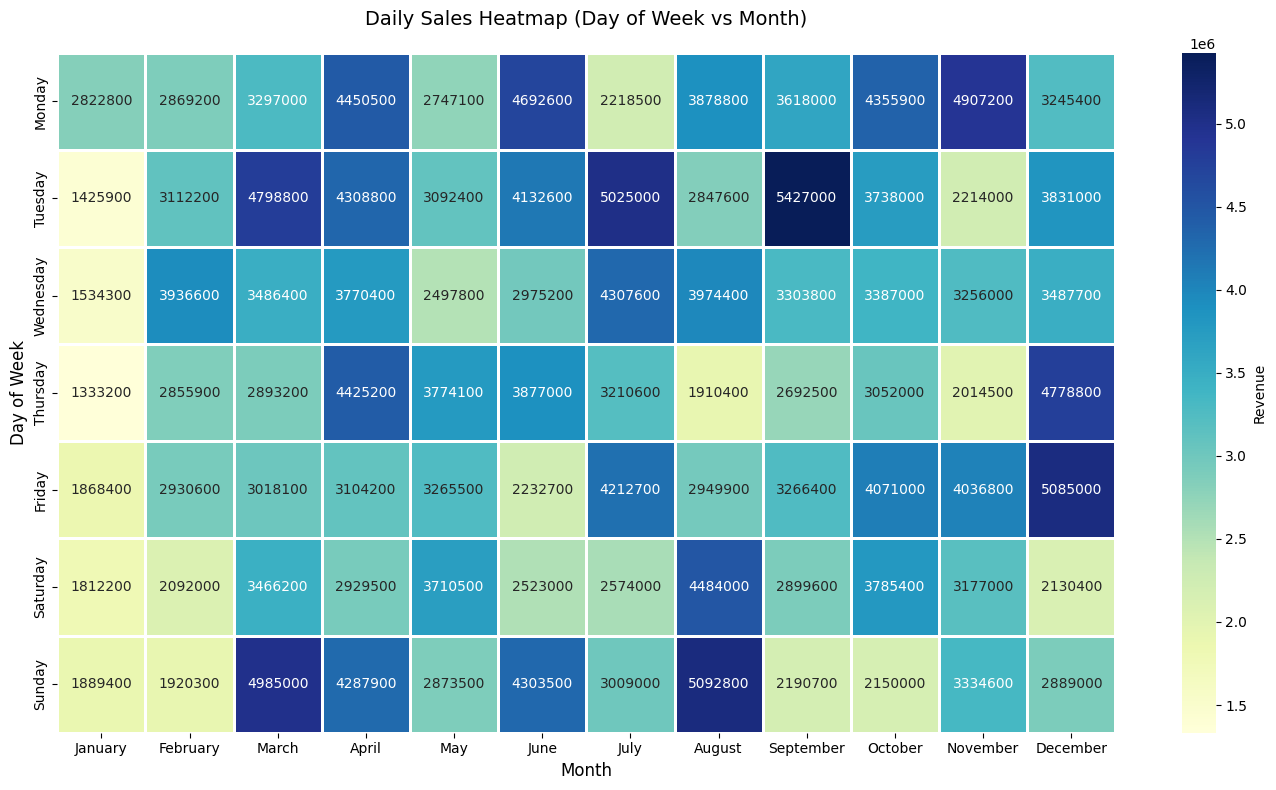

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(
    values='Revenue',
    index='DayOfWeek',
    columns='Month',
    aggfunc='sum'
).reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], axis=0).reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt=".0f",
    linewidths=1,  # Adds visible borders
    linecolor='white',  # Color of box borders
    cbar_kws={'label': 'Revenue'}
)
plt.title('Daily Sales Heatmap (Day of Week vs Month)', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)

plt.tight_layout()
plt.show()

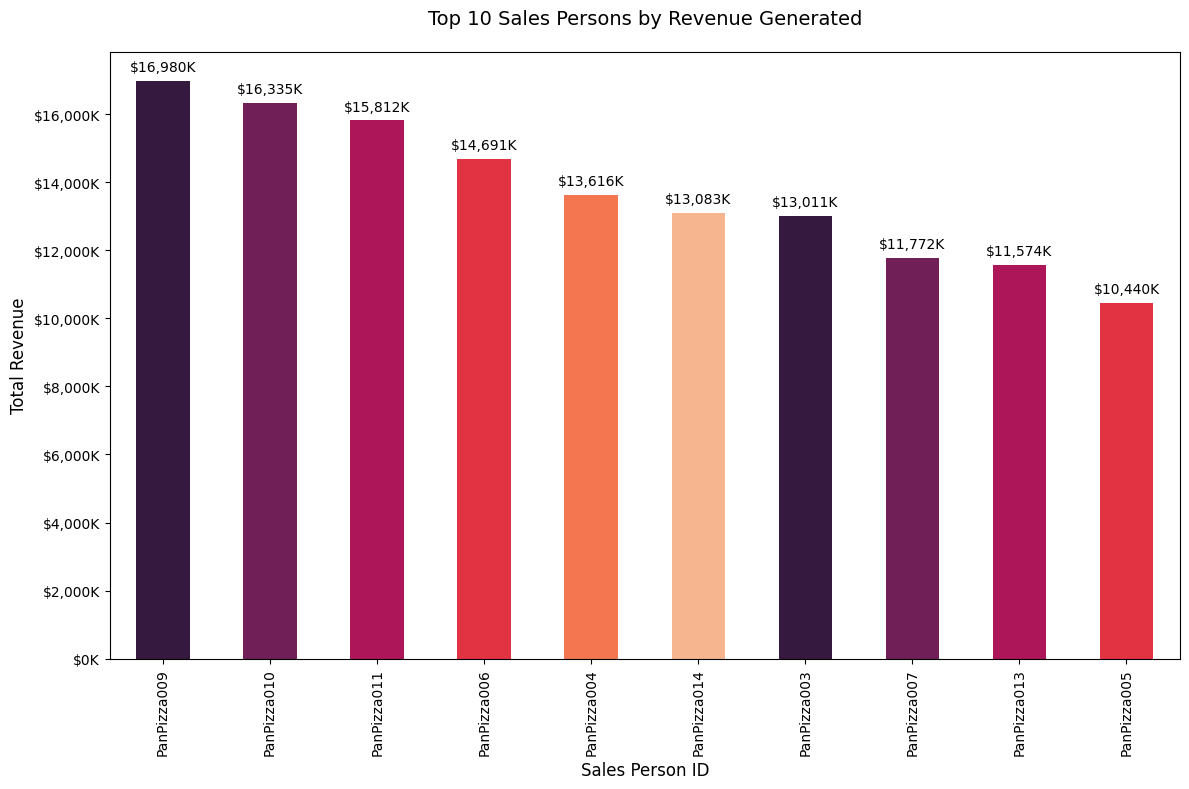

In [ ]:
plt.figure(figsize=(12, 8))
sales_performance = df.groupby('Sales person (2).Sales Person ID')['Revenue'].sum().sort_values(ascending=False).head(10)

ax = sales_performance.plot(kind='bar', color=sns.color_palette("rocket"))
plt.title('Top 10 Sales Persons by Revenue Generated', fontsize=14, pad=20)
plt.xlabel('Sales Person ID', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Format y-axis as currency
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"${x/1000:,.0f}K"))

# Add value labels
for p in ax.patches:
    ax.annotate(f"${p.get_height()/1000:,.0f}K",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

<Figure size 500x500 with 0 Axes>

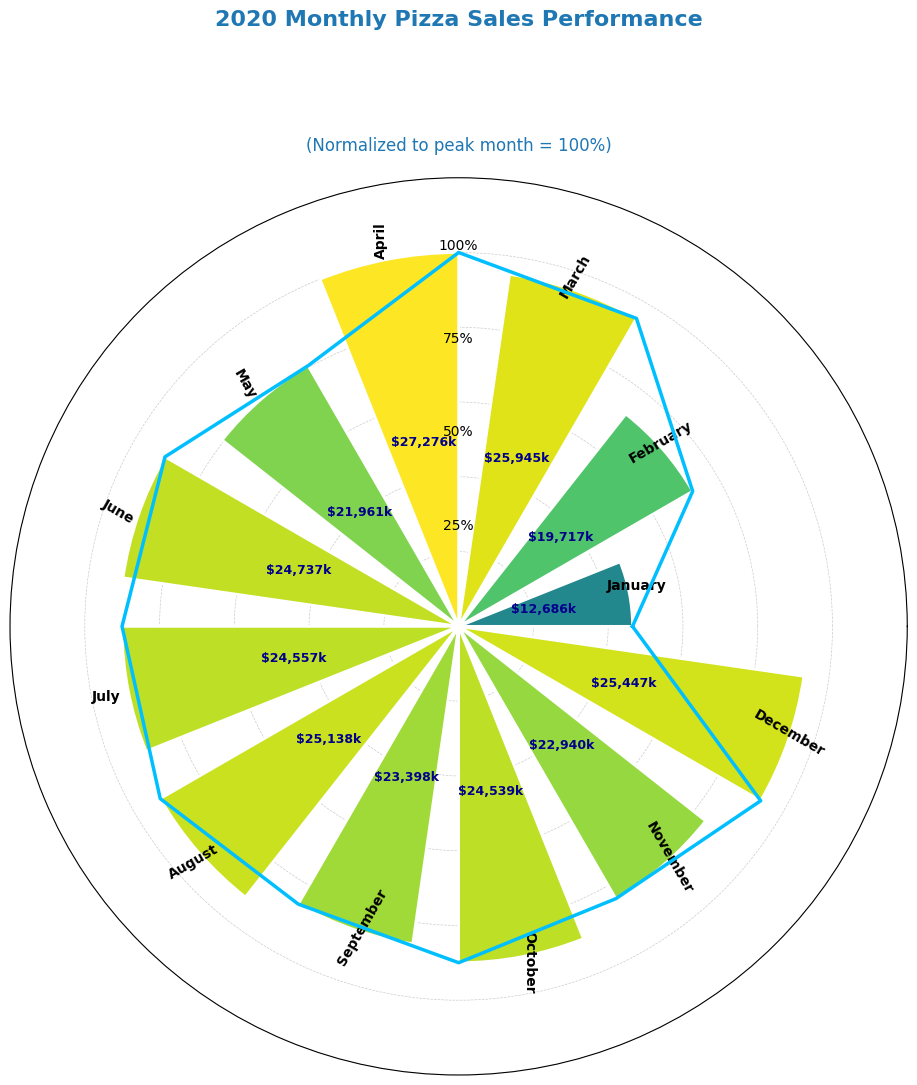

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl

plt.figure(figsize=(5, 5))

# Data
df = pd.DataFrame({
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'],
    'Revenue': [12686, 19717, 25945, 27276, 21961, 24737, 24557,
                25138, 23398, 24539, 22940, 25447]
})

# Normalize revenue
df['Normalized'] = df['Revenue'] / df['Revenue'].max() * 100

# Set angle for each month (12 months -> 360 degrees)
angles = np.linspace(0, 2 * np.pi, len(df), endpoint=False).tolist()
df['Angle'] = angles

# Plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
fig.suptitle("2020 Monthly Pizza Sales Performance", fontsize=16, fontweight='bold', color='#1f77b4', y=1.08)
plt.title("(Normalized to peak month = 100%)", fontsize=12, color='#1f77b4', y=1.02)

# Bars
bars = ax.bar(df['Angle'], df['Normalized'], width=0.38, color=plt.cm.viridis(df['Normalized'] / 100),
              edgecolor='white', linewidth=2, align='edge', zorder=3)

# Line plot over bars
ax.plot(np.append(df['Angle'].values, df['Angle'].values[0]),
        np.append(df['Normalized'].values, df['Normalized'].values[0]),
        color='deepskyblue', linewidth=2.5, zorder=4)

# Revenue labels inside bars
for i, (angle, revenue) in enumerate(zip(df['Angle'], df['Revenue'])):
    ax.text(angle + 0.19, df['Normalized'][i] * 0.5,
            f"${revenue:,.0f}k",
            ha='center', va='center', fontsize=9, fontweight='bold', color='darkblue', zorder=5)

# Month labels outside bars
for i, (angle, month) in enumerate(zip(df['Angle'], df['Month'])):
    rotation = np.degrees(angle)
    align = 'left' if np.pi/2 < angle < 3*np.pi/2 else 'right'
    ax.text(angle + 0.19, df['Normalized'][i] + 10,
            month,
            ha=align, va='center',
            rotation=rotation if align == 'right' else rotation + 180,
            rotation_mode='anchor',
            fontsize=10, fontweight='bold', color='black')

# Remove default labels and gridlines
ax.set_yticklabels([])
ax.set_xticks([])
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.4)
ax.set_ylim(0, 120)

# Custom radial labels
for r in [25, 50, 75, 100]:
    ax.text(np.pi/2, r, f'{r}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
